# PyCaret

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This is how to use pycaret in Google colab
# from pycaret.utils import enable_colab
# enable_colab()

In [3]:
# xlrd will suport excel file
# !pip install xlrd

In [4]:
from pycaret.utils import version
version()

'2.3.3'

## Import dataset

In [5]:
# Import dataset directily from pycaret
# The same data from the last importation, but the columns names are differents
from pycaret.datasets import get_data
dataset = get_data("credit")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [6]:
dataset.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [7]:
# Attribute Information:

# This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
# X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
# X2: Gender (1 = male; 2 = female).
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# X4: Marital status (1 = married; 2 = single; 3 = others).
# X5: Age (year).
# X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
# X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
# X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Split dataset into training, test and validation

In [8]:
dataset.shape

(24000, 24)

In [9]:
# split dataset for validation. 5% = validation
data = dataset.sample(frac=0.95, random_state=786)

In [10]:
data.shape

(22800, 24)

In [11]:
# remove content of "data" from "dataset" and store into a new dataset
data_unseen = dataset.drop(data.index)

In [12]:
# sata for validation
data_unseen

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
39,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
57,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
72,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
103,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23978,50000,1,2,1,37,1,2,2,2,0,...,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1
23979,220000,1,2,1,41,0,0,-1,-1,-2,...,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0
23981,420000,1,1,2,34,0,0,0,0,0,...,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0
23985,90000,1,2,1,36,0,0,0,0,0,...,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1


In [13]:
# reset index
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [14]:
data.shape

(22800, 24)

In [15]:
data_unseen.shape

(1200, 24)

## Setup of the environment

In [16]:
from pycaret.classification import *

In [17]:
# Assign the pycaret setup method
model_setup = setup(data=data, target="default", session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


## Compare models

In [18]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0620
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.3930
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,2.8080
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.6850
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.2270
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,1.5710
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,1.5820
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.8710
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.6230
dt,Decision Tree Classifier,0.7293,0.6147,0.4104,0.3878,0.3986,0.2242,0.2245,0.2150


In [19]:
# Print parameters for the best model
print(best_model);

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)


# Pipeline with PyCaret
## Create Model

In [20]:
# Models list
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


# Creating dt models as example

In [21]:
# Crete model Decision Tree Classifier
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038
9,0.7442,0.6272,0.4195,0.4148,0.4171,0.2533,0.2533


In [22]:
# Print Decision Tree parameters
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


## Tune Model

In [23]:
tunned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801
9,0.8188,0.7378,0.3075,0.6903,0.4254,0.3362,0.3751


In [24]:
tunned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [25]:
# Tunne model with custom parameters example
# import numpy as np
# tnned_knn = tune_model(knn, custom_grid={'n_neighbors' : np.arange(0,50,1)})

## Some Graphics

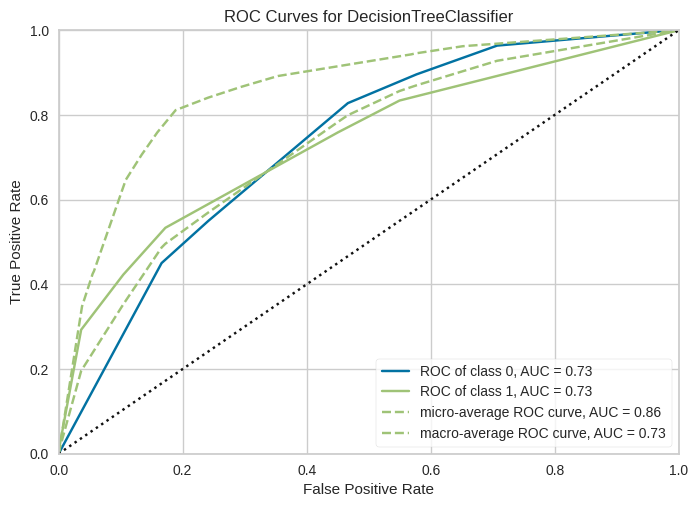

In [26]:
## SUC
plot_model(tunned_dt, plot='auc')

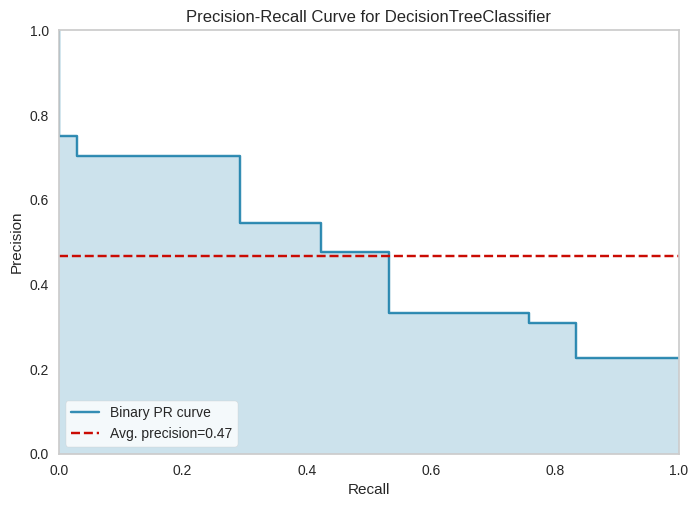

In [27]:
# Precision recall
plot_model(tunned_dt, plot="pr")

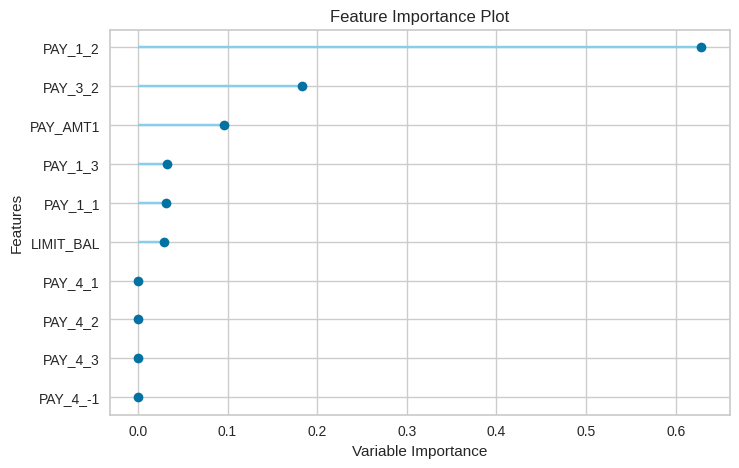

In [28]:
# Feature
plot_model(tunned_dt, plot="feature")

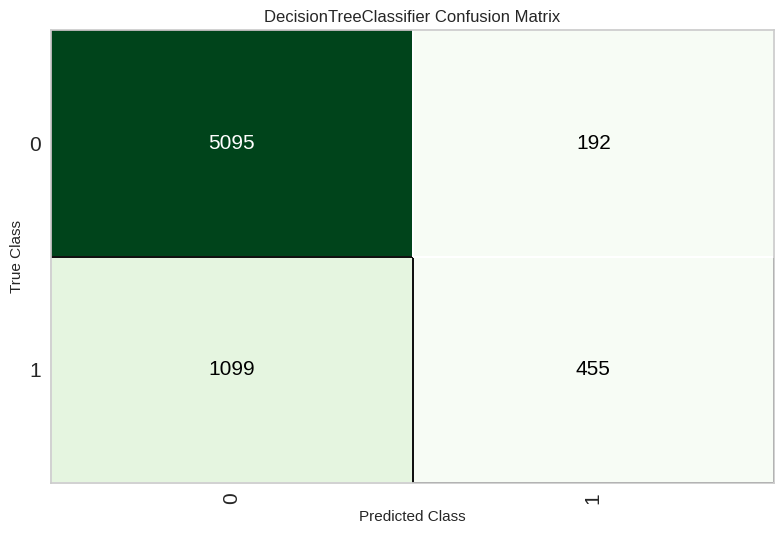

In [29]:
# confusion_matrix
plot_model(tunned_dt, plot="confusion_matrix")

## Evaluate the Model

In [30]:
evaluate_model(tunned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizing Model
* Adjust the trained model to the complete dataset, including the data of test

In [31]:
final_dt = finalize_model(tunned_dt)

## Prediction - predict_model()

In [32]:
# Prediction over test dataset
predict_model(tunned_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8113,0.7340,0.2928,0.7032,0.4134,0.3230,0.3672


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,80000.0,29.0,6228.0,589.0,390.0,390.0,390.0,383.0,589.0,390.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8215
1,180000.0,30.0,149069.0,152317.0,156282.0,161163.0,172190.0,148963.0,7500.0,8000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9123
2,100000.0,26.0,18999.0,23699.0,9390.0,5781.0,8065.0,17277.0,5129.0,1227.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9123
3,500000.0,36.0,396.0,1043.0,19230.0,116696.0,194483.0,195454.0,1043.0,19230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8215
4,190000.0,47.0,192493.0,193297.0,193400.0,193278.0,192956.0,193039.0,7200.0,7222.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,120000.0,44.0,75294.0,76465.0,74675.0,79629.0,77748.0,82497.0,3000.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6225
6837,50000.0,26.0,47095.0,48085.0,49039.0,49662.0,0.0,0.0,2073.0,2027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8313
6838,80000.0,39.0,46401.0,39456.0,30712.0,29629.0,28241.0,28030.0,1560.0,1421.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8215
6839,200000.0,33.0,50612.0,10537.0,5552.0,2506.0,9443.0,11818.0,10023.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6225


In [33]:
# Prediction over that 5% reserved data.
predict_model(tunned_dt, data=data_unseen)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8215
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9123
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.9123
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7025
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.9123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,1,2,2,2,0,...,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,0,0.6225
1196,220000,1,2,1,41,0,0,-1,-1,-2,...,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9123
1197,420000,1,1,2,34,0,0,0,0,0,...,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.9123
1198,90000,1,2,1,36,0,0,0,0,0,...,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.8215


In [34]:
# Get only the metrics
from pycaret.utils import check_metric
# check_metric(prediction.default, prediction.Label, 'Accuracy')

In [35]:
save_model(final_dt, 'Final DT Model 10Ago2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=6,
                        

In [36]:
# Load the model
saved_final_dt = load_model('Final DT Model 10Ago2021')

Transformation Pipeline and Model Successfully Loaded


In [37]:
new_prediction = predict_model(saved_final_dt, data=data_unseen)

In [38]:
new_prediction

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,0,-1,-1,0,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.7609
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.8975
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.8438
3,200000,1,1,1,53,2,2,2,2,2,...,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,1,0.7013
4,240000,1,1,2,41,1,-1,-1,0,0,...,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.8975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,1,2,2,2,0,...,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,0,0.5965
1196,220000,1,2,1,41,0,0,-1,-1,-2,...,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.8975
1197,420000,1,1,2,34,0,0,0,0,0,...,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.8975
1198,90000,1,2,1,36,0,0,0,0,0,...,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.8438
